<a href="https://colab.research.google.com/github/niruthikka24/Customer-Churn-Dashboard/blob/master/Churn_Insights_for_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split
from sklearn import svm
import plotly.express as px
from scipy.stats import pointbiserialr

In [ ]:
up1 = files.upload()

Saving Train_Dataset_190604N.csv to Train_Dataset_190604N.csv


In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

customer_id  account_length  location_code intertiol_plan voice_mail_plan  \
0         1001            15.0            452             no              no   
1         1002           105.0            452             no              no   
2         1003            97.0            452             no             yes   
3         1004           121.0            445             no             yes   
4         1005            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
0          216.0             86.0             18.36                235.1   
1          175.2             97.0             14.89                222.4   
2          269.1            120.0             22.87                203.5   
3          209.2             69.0             17.78                197.4   
4           93.4            143.0              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               33.0               10.58                16.1   
1               36.0               10.01                12.0   
2               38.0                9.16                 6.7   
3               42.0                8.88                11.4   
4               42.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls Churn  
0               5.0               4.35                     2.0    No  
1               5.0               3.24                     3.0    No  
2               4.0               1.81                     5.0    No  
3               4.0               3.08                     1.0    No  
4               5.0               2.62                     0.0    No

In [ ]:
df.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

In [ ]:
# df.drop(['years'],axis=1,inplace=True)
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
df["intertiol_plan"] = df["intertiol_plan"].replace(scale_mapper)
df["voice_mail_plan"] = df["voice_mail_plan"].replace(scale_mapper)
df["Churn"] = df["Churn"].replace(scale_mapper1)
df["location_code"] = df["location_code"].replace(scale_mapper2)
df.head()

customer_id  account_length  location_code  intertiol_plan  \
0         1001            15.0              2               0   
1         1002           105.0              2               0   
2         1003            97.0              2               0   
3         1004           121.0              1               0   
4         1005            98.0              2               0   

   voice_mail_plan  number_vm_messages  total_day_min  total_day_calls  \
0                0                 0.0          121.1            130.0   
1                0                 0.0          259.3             96.0   
2                1                32.0          183.4             94.0   
3                1                35.0           68.7             95.0   
4                1                22.0          278.3             89.0   

   total_day_charge  total_eve_min  total_eve_calls  total_eve_charge  \
0             20.59          216.0             86.0             18.36   
1             44.08          175.2             97.0             14.89   
2             31.18          269.1            120.0             22.87   
3             11.68          209.2             69.0             17.78   
4             47.31           93.4            143.0              7.94   

   total_night_minutes  total_night_calls  total_night_charge  \
0                235.1               33.0               10.58   
1                222.4               36.0               10.01   
2                203.5               38.0                9.16   
3                197.4               42.0                8.88   
4                107.6               42.0                4.84   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                16.1               5.0               4.35   
1                12.0               5.0               3.24   
2                 6.7               4.0               1.81   
3                11.4               4.0               3.08   
4                 9.7               5.0               2.62   

   customer_service_calls  Churn  
0                     2.0      0  
1                     3.0      0  
2                     5.0      0  
3                     1.0      0  
4                     0.0      0

In [ ]:
X = df.drop(['customer_id','Churn'],axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
X_train.head()

account_length  location_code  intertiol_plan  voice_mail_plan  \
1207           128.0              2               0                1   
594            106.0              2               0                0   
452             92.0              1               1                0   
1589           122.0              1               0                1   
1287            99.0              1               0                0   

      number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
1207                25.0          265.1            110.0             45.07   
594                  0.0          147.9             97.0             25.14   
452                  0.0           67.6            107.0             12.64   
1589                23.0          134.2             85.0             22.81   
1287                 0.0          190.4            102.0             32.37   

      total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
1207          197.4             99.0             16.78                244.7   
594           209.3             99.0             17.79                162.1   
452           181.6            121.0             14.35                231.7   
1589          227.3            132.0             19.32                122.4   
1287          158.1            107.0             13.44                271.5   

      total_night_calls  total_night_charge  total_intl_minutes  \
1207               91.0               11.01                10.0   
594                80.0                7.29                 8.8   
452                76.0                9.98                10.4   
1589               96.0                5.51                 8.5   
1287               92.0               12.22                11.2   

      total_intl_calls  total_intl_charge  customer_service_calls  
1207               3.0               2.70                     1.0  
594                5.0               2.38                     2.0  
452                2.0               2.81                     1.0  
1589               2.0               2.30                     2.0  
1287               4.0               3.02                     2.0

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(acc(y_test,preds))
print(f1(y_test,preds))

0.9200863930885529
0.8229665071770336


In [ ]:
train['Churn'].value_counts()

No     1737
Yes     575
Name: Churn, dtype: int64

In [ ]:
train['customer_service_calls'].value_counts()

1.0    778
2.0    494
0.0    494
3.0    285
4.0    162
5.0     65
6.0     21
7.0      9
9.0      2
8.0      2
Name: customer_service_calls, dtype: int64

In [ ]:
train[train['location_code']==445]['Churn'].value_counts()

No     439
Yes    160
Name: Churn, dtype: int64

In [ ]:
train.describe()

customer_id  account_length  location_code  number_vm_messages  \
count  2312.000000     2312.000000    2312.000000         2312.000000   
mean   2160.234862      101.327422     473.525519            7.677336   
std     669.933019       39.923689      42.039577           13.588330   
min    1001.000000        1.000000     445.000000            0.000000   
25%    1579.750000       74.000000     445.000000            0.000000   
50%    2161.500000      101.000000     452.000000            0.000000   
75%    2740.250000      127.000000     452.000000           14.250000   
max    3321.000000      232.000000     547.000000           51.000000   

       total_day_min  total_day_calls  total_day_charge  total_eve_min  \
count    2312.000000      2312.000000       2312.000000    2312.000000   
mean      182.293599       100.771626         30.989252     201.517085   
std        57.676550        20.467168          9.768751      50.928885   
min         0.000000         0.000000          0.000000       0.000000   
25%       144.175000        87.000000         24.495000     165.975000   
50%       180.450000       102.000000         30.600000     202.500000   
75%       221.000000       115.000000         37.605000     236.400000   
max       350.800000       165.000000         60.960000     358.500000   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      2312.000000       2312.000000          2312.000000   
mean        100.230104         17.135212           201.031055   
std          19.827224          4.323711            50.611196   
min           0.000000          0.000000            23.200000   
25%          87.000000         14.190000           167.275000   
50%         101.000000         17.220000           201.000000   
75%         114.000000         20.090000           234.900000   
max         170.000000         30.830000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        2312.000000         2312.000000         2312.000000   
mean           87.633218            9.044827           10.271064   
std            12.730692            2.278361            2.715125   
min            33.000000            1.040000            0.000000   
25%            79.000000            7.530000            8.600000   
50%            90.000000            9.050000           10.300000   
75%            98.000000           10.572500           12.000000   
max           105.000000           17.770000           18.300000   

       total_intl_calls  total_intl_charge  customer_service_calls  \
count       2312.000000        2312.000000             2312.000000   
mean           4.451125           2.773702                1.650952   
std            2.450062           0.732984                1.429327   
min            0.000000           0.000000                0.000000   
25%            3.000000           2.320000                1.000000   
50%            4.000000           2.780000                1.000000   
75%            6.000000           3.240000                2.000000   
max           20.000000           4.940000                9.000000   

            tenure  
count  2312.000000  
mean      8.439014  
std       3.334607  
min       0.000000  
25%       6.000000  
50%       8.000000  
75%      11.000000  
max      19.000000

In [ ]:
train[train['customer_service_calls']==7]

customer_id  account_length  location_code intertiol_plan  \
369          1370           115.0            452             no   
401          1403           115.0            452             no   
1140         2146           136.0            452             no   
1497         2503            99.0            445             no   
1621         2627            99.0            445             no   
1629         2635            99.0            452             no   
1758         2765            99.0            452             no   
1874         2881           146.0            445             no   
1913         2920           146.0            445             no   

     voice_mail_plan  number_vm_messages  total_day_min  total_day_calls  \
369               no                 0.0          139.3             89.0   
401               no                 0.0          122.3             93.0   
1140              no                 0.0          163.4             83.0   
1497              no                 0.0          135.7            107.0   
1621              no                 0.0          135.7            115.0   
1629              no                 0.0          102.5             77.0   
1758              no                 0.0          115.5             75.0   
1874              no                 0.0          149.3             83.0   
1913              no                 0.0          158.3             78.0   

      total_day_charge  total_eve_min  total_eve_calls  total_eve_charge  \
369              23.68          192.3             95.0             16.35   
401              24.68          184.3            101.0             15.35   
1140             27.78          249.3            119.0             21.19   
1497             23.07          208.4            103.0             17.71   
1621             24.07          208.4            103.0             18.71   
1629             18.64          208.1            110.0             19.54   
1758             19.64          218.1            111.0             18.54   
1874             25.38          187.1            130.0             15.90   
1913             23.38          182.1            128.0             14.90   

      total_night_minutes  total_night_calls  total_night_charge  \
369                 151.0               75.0                6.80   
401                 162.0               75.0                6.80   
1140                249.7               90.0               11.24   
1497                209.0               95.0                9.40   
1621                211.0               96.0                9.40   
1629                245.9               96.0               11.47   
1758                254.9               98.0               11.47   
1874                149.8              100.0                6.74   
1913                136.8              100.0                6.74   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
369                  9.3               3.0               2.51   
401                  9.3               4.0               2.51   
1140                 9.8               4.0               2.65   
1497                 8.8               3.0               2.38   
1621                 8.8               2.0               2.38   
1629                11.5               8.0               3.11   
1758                11.5               7.0               3.11   
1874                 7.9               4.0               2.13   
1913                 7.9               3.0               2.13   

      customer_service_calls Churn  
369                      7.0   Yes  
401                      7.0   Yes  
1140                     7.0   Yes  
1497                     7.0   Yes  
1621                     7.0   Yes  
1629                     7.0   Yes  
1758                     7.0   Yes  
1874                     7.0   Yes  
1913                     7.0   Yes

In [ ]:
train['tenure'] = round(train['account_length']/12,0)
train[train['tenure']==0]

customer_id  account_length  location_code intertiol_plan  \
397          1398             1.0            452             no   
544          1546             1.0            452             no   
559          1561             6.0            547             no   
560          1562             1.0            452             no   
657          1659             1.0            445             no   
724          1726             4.0            547            yes   
844          1849             5.0            452             no   
958          1963             3.0            445             no   
1075         2081             3.0            452             no   
1114         2120             3.0            452             no   
1255         2261             1.0            452             no   
1381         2387             3.0            547             no   
1750         2757             6.0            445             no   
2114         3122             3.0            547            yes   

     voice_mail_plan  number_vm_messages  total_day_min  total_day_calls  \
397               no                 0.0          182.1            106.0   
544               no                 0.0          182.1            106.0   
559               no                 0.0          183.6            117.0   
560               no                 0.0          144.8            107.0   
657               no                 0.0          123.8            113.0   
724               no                 0.0          145.3             89.0   
844               no                 0.0          199.2            106.0   
958               no                 0.0          139.0             99.0   
1075             yes                36.0          118.1            117.0   
1114              no                 0.0          185.0            120.0   
1255              no                 0.0          196.1            107.0   
1381             yes                27.0           67.4            116.0   
1750              no                 0.0          226.5             93.0   
2114              no                 0.0          161.0             96.0   

      total_day_charge  total_eve_min  ...  total_eve_charge  \
397              30.96          134.9  ...             11.47   
544              31.96          131.9  ...             10.47   
559              31.21          256.7  ...             21.82   
560              24.62          112.5  ...              9.56   
657              21.05          236.2  ...             20.08   
724              24.70          303.8  ...             25.82   
844              33.86          187.3  ...             15.92   
958              23.63          250.7  ...             21.31   
1075             20.08          221.5  ...             18.83   
1114             31.45          203.7  ...             17.31   
1255             33.34          296.5  ...             25.20   
1381             11.46          244.0  ...             20.74   
1750             38.51          152.1  ...             12.93   
2114             27.37          244.9  ...             20.82   

      total_night_minutes  total_night_calls  total_night_charge  \
397                 152.3               75.0                6.85   
544                 155.3               78.0                6.85   
559                 178.6               79.0                8.04   
560                 218.7               79.0                9.84   
657                  73.2               81.0                3.29   
724                 206.1               82.0                9.27   
844                 214.0               85.0                9.63   
958                 286.2               87.0               12.88   
1075                103.9               89.0                4.68   
1114                170.5               89.0                7.67   
1255                211.5               91.0                9.52   
1381                281.1               93.0               12.65   
1750          

In [ ]:
160/(160+439)

0.2671118530884808

In [ ]:
575*100/(1737+575)

24.870242214532873

In [ ]:
train['total_charge'] = train['total_day_charge'] + train

In [ ]:
train1 = train.drop(['customer_id','location_code','Unnamed: 20'],axis=1)
train1.describe().transpose()

count        mean         std     min      25%  \
account_length          2319.0  101.400172   40.044985    1.00   74.000   
number_vm_messages      2318.0    7.557377   14.250001 -202.00    0.000   
total_day_min           2320.0  182.718103   73.332822 -179.90  144.000   
total_day_calls         2318.0  105.324418  221.100535   -1.00   87.000   
total_day_charge        2316.0   30.961524    9.830271  -25.60   24.480   
total_eve_min           2318.0  203.511734  115.552100 -103.30  165.925   
total_eve_calls         2317.0  100.125162   20.536224  -80.00   87.000   
total_eve_charge        2313.0   17.123130    4.327327    0.00   14.180   
total_night_minutes     2319.0  209.543467  408.066120   23.20  167.350   
total_night_calls       2316.0   87.641192   12.737232   33.00   79.000   
total_night_charge      2316.0    9.436710   18.656075    1.04    7.530   
total_intl_minutes      2319.0   10.247736    2.795472   -9.30    8.600   
total_intl_calls        2318.0    4.439172    2.461172    0.00    3.000   
total_intl_charge       2316.0    2.773364    0.733526    0.00    2.320   
customer_service_calls  2320.0    1.651724    1.429166    0.00    1.000   

                           50%       75%       max  
account_length          101.00  127.0000    232.00  
number_vm_messages        0.00   14.0000     51.00  
total_day_min           180.35  221.0000   2283.90  
total_day_calls         102.00  115.0000  10700.00  
total_day_charge         30.60   37.5900     60.96  
total_eve_min           202.40  236.4000   5186.40  
total_eve_calls         101.00  114.0000    170.00  
total_eve_charge         17.21   20.0900     30.83  
total_night_minutes     201.10  235.0500  19700.00  
total_night_calls        90.00   98.0000    105.00  
total_night_charge        9.05   10.5825    900.15  
total_intl_minutes       10.30   12.0000     18.30  
total_intl_calls          4.00    6.0000     20.00  
total_intl_charge         2.78    3.2400      4.94  
customer_service_calls    1.00    2.0000      9.00

In [ ]:
# missing = pd.DataFrame(train.isna().sum())
# missing
train.isna().sum()

customer_id                  0
account_length               2
location_code                0
intertiol_plan               3
voice_mail_plan              6
number_vm_messages           3
total_day_min                1
total_day_calls              3
total_day_charge             5
total_eve_min                3
total_eve_calls              4
total_eve_charge             8
total_night_minutes          2
total_night_calls            5
total_night_charge           5
total_intl_minutes           2
total_intl_calls             3
total_intl_charge            5
customer_service_calls       1
Churn                        5
Unnamed: 20               2317
dtype: int64

In [ ]:
train.location_code.unique()

array([452, 445, 547])

In [ ]:
train.intertiol_plan.unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
train.voice_mail_plan.unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
train.Churn.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
train.Churn.value_counts()

No     1741
Yes     575
Name: Churn, dtype: int64

In [ ]:
train['account_length'].unique()

array([ 15., 105.,  97., 121.,  98., 151., 170.,  39.,  94.,  93.,  61.,
       137.,  85., 113., 101.,  32., 149.,  54.,  52., 174., 160., 122.,
        96.,  79.,  24.,  55.,  63., 117.,  71.,  56., 110., 108.,  74.,
        95.,  99.,  10.,  90.,  86., 177.,  75., 131., 135., 102.,  50.,
        73., 123., 164., 142.,  69., 134.,  82., 126., 162.,  84., 143.,
       125., 106., 100., 152.,  80., 148.,  44., 124.,  60., 167., 173.,
       139., 118., 104.,  91., 127., 138., 107., 129.,  77., 119., 171.,
       205.,  40., 116., 130.,  16.,  53., 115.,  31.,  70.,  83.,  64.,
       172.,  88.,  51., 140., 103.,  87.,  89., 169.,  76., 210.,  43.,
        66., 144.,  81., 109., 128., 161.,  35., 180., 189., 145., 209.,
       112.,  62., 120., 196.,  68.,  65., 146.,  72.,  27., 153.,  48.,
        67.,  33.,  42.,  45.,  46., 179., 166., 147., 157.,  34.,  23.,
       190.,  47.,  59.,  78.,  92., 163.,  41., 154.,  36.,  58.,  57.,
       158.,   1., 136., 111., 132., 150., 156.,   

In [ ]:
train.shape

(2321, 21)

In [ ]:
train.drop_duplicates(subset=train.columns.difference(['customer_id']),inplace=True)
train.shape

(2317, 21)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

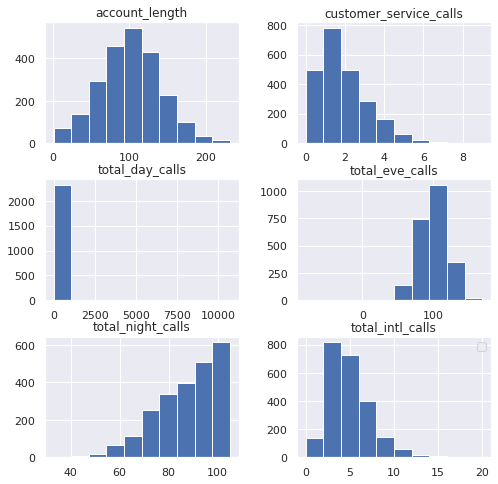

In [ ]:
train1 = train.loc[:,['account_length','customer_service_calls','total_day_calls','total_eve_calls','total_night_calls','total_intl_calls']]
sns.set()
plt.gcf().clear()
train1.hist(figsize = (8,8))
plt.xlabel('')
plt.legend() 

In [ ]:
traindf = train.copy(deep=True)

In [ ]:
charge_cols = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
minute_cols = ['total_day_min','total_eve_min','total_night_minutes','total_intl_minutes']

for i in range(0,4):
  #calculating the charge/minute rate for different types of calls
  traindf['col' + str(i)] = traindf[charge_cols[i]]/traindf[minute_cols[i]]
  print('For ' + charge_cols[i] +"/" + minute_cols[i] + ", Mean : %.3f, Median : %.3f and Mode : %.3f \n" 
        % (traindf['col' + str(i)].mean(), traindf['col' + str(i)].median(), traindf['col' + str(i)].mode()))


For total_day_charge/total_day_min, Mean : 0.170, Median : 0.170 and Mode : 0.170 

For total_eve_charge/total_eve_min, Mean : 0.085, Median : 0.085 and Mode : 0.085 

For total_night_charge/total_night_minutes, Mean : 0.047, Median : 0.045 and Mode : 0.045 

For total_intl_charge/total_intl_minutes, Mean : 0.269, Median : 0.270 and Mode : 0.270 



In [ ]:
train.isna().sum()

customer_id                  0
account_length               2
location_code                0
intertiol_plan               3
voice_mail_plan              6
number_vm_messages           3
total_day_min                1
total_day_calls              3
total_day_charge             5
total_eve_min                3
total_eve_calls              4
total_eve_charge             8
total_night_minutes          2
total_night_calls            5
total_night_charge           5
total_intl_minutes           2
total_intl_calls             3
total_intl_charge            5
customer_service_calls       1
Churn                        5
Unnamed: 20               2317
dtype: int64

In [ ]:
232/12

19.333333333333332

In [ ]:
up = files.upload()

Saving Test_Dataset_190604N.csv to Test_Dataset_190604N.csv
Saving Train_Dataset_190604N.csv to Train_Dataset_190604N.csv


In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

customer_id  account_length  location_code intertiol_plan voice_mail_plan  \
0         1001            15.0            452             no              no   
1         1002           105.0            452             no              no   
2         1003            97.0            452             no             yes   
3         1004           121.0            445             no             yes   
4         1005            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
0          216.0             86.0             18.36                235.1   
1          175.2             97.0             14.89                222.4   
2          269.1            120.0             22.87                203.5   
3          209.2             69.0             17.78                197.4   
4           93.4            143.0              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               33.0               10.58                16.1   
1               36.0               10.01                12.0   
2               38.0                9.16                 6.7   
3               42.0                8.88                11.4   
4               42.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls Churn  
0               5.0               4.35                     2.0    No  
1               5.0               3.24                     3.0    No  
2               4.0               1.81                     5.0    No  
3               4.0               3.08                     1.0    No  
4               5.0               2.62                     0.0    No

In [ ]:
df.describe()

customer_id  account_length  location_code  number_vm_messages  \
count  2312.000000     2312.000000    2312.000000         2312.000000   
mean   2160.234862      101.327422     473.525519            7.677336   
std     669.933019       39.923689      42.039577           13.588330   
min    1001.000000        1.000000     445.000000            0.000000   
25%    1579.750000       74.000000     445.000000            0.000000   
50%    2161.500000      101.000000     452.000000            0.000000   
75%    2740.250000      127.000000     452.000000           14.250000   
max    3321.000000      232.000000     547.000000           51.000000   

       total_day_min  total_day_calls  total_day_charge  total_eve_min  \
count    2312.000000      2312.000000       2312.000000    2312.000000   
mean      182.293599       100.771626         30.989252     201.517085   
std        57.676550        20.467168          9.768751      50.928885   
min         0.000000         0.000000          0.000000       0.000000   
25%       144.175000        87.000000         24.495000     165.975000   
50%       180.450000       102.000000         30.600000     202.500000   
75%       221.000000       115.000000         37.605000     236.400000   
max       350.800000       165.000000         60.960000     358.500000   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      2312.000000       2312.000000          2312.000000   
mean        100.230104         17.135212           201.031055   
std          19.827224          4.323711            50.611196   
min           0.000000          0.000000            23.200000   
25%          87.000000         14.190000           167.275000   
50%         101.000000         17.220000           201.000000   
75%         114.000000         20.090000           234.900000   
max         170.000000         30.830000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        2312.000000         2312.000000         2312.000000   
mean           87.633218            9.044827           10.271064   
std            12.730692            2.278361            2.715125   
min            33.000000            1.040000            0.000000   
25%            79.000000            7.530000            8.600000   
50%            90.000000            9.050000           10.300000   
75%            98.000000           10.572500           12.000000   
max           105.000000           17.770000           18.300000   

       total_intl_calls  total_intl_charge  customer_service_calls  
count       2312.000000        2312.000000             2312.000000  
mean           4.451125           2.773702                1.650952  
std            2.450062           0.732984                1.429327  
min            0.000000           0.000000                0.000000  
25%            3.000000           2.320000                1.000000  
50%            4.000000           2.780000                1.000000  
75%            6.000000           3.240000                2.000000  
max           20.000000           4.940000                9.000000

In [ ]:
df.isna().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
Churn                     0
dtype: int64

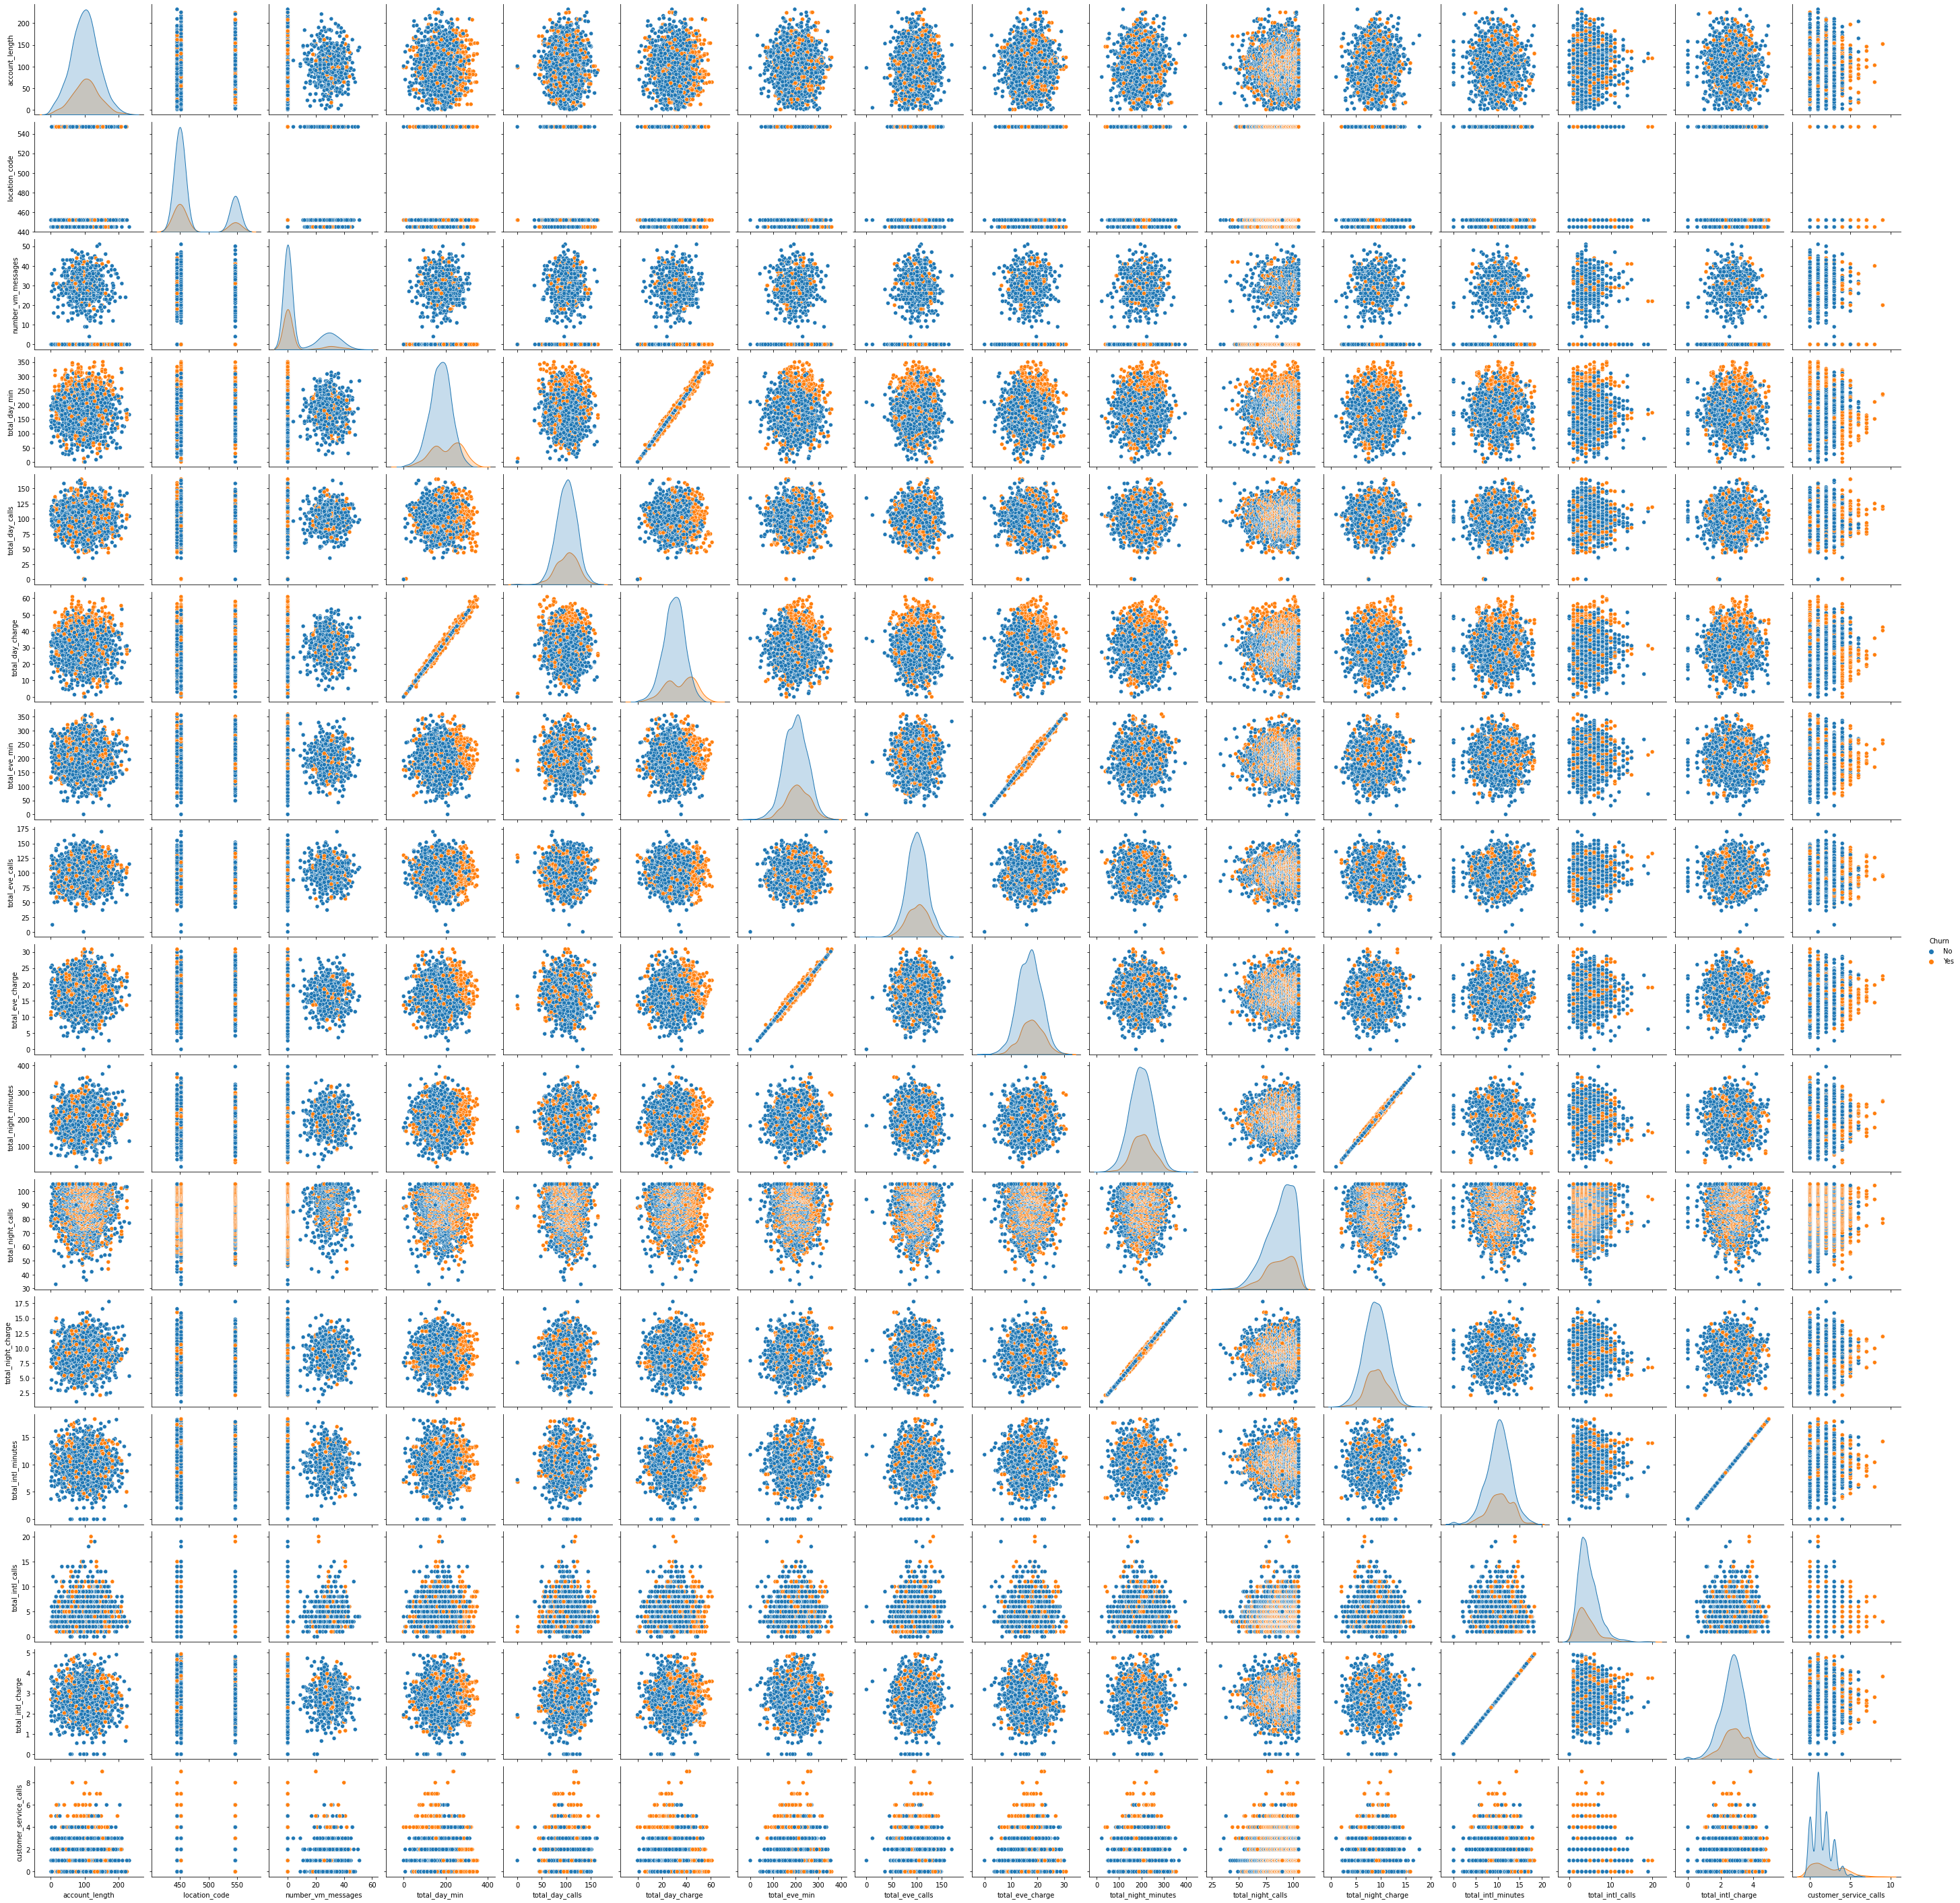

In [ ]:
df1 = df.drop(['customer_id'],axis=1)
sns.pairplot(df1, hue = 'Churn')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

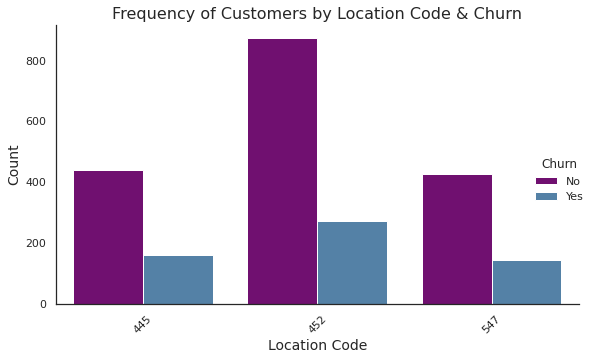

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

g = sns.catplot(x="who", y="survived", col="class",
                 data=titanic, saturation=.5,
                 kind="bar", ci=None, aspect=.6)


sns.catplot( x='location_code',
             kind="count", 
             hue="Churn", 
             palette=['purple', 'steelblue'],
             height=5, 
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by Location Code & Churn', fontsize=16)

plt.xlabel("Location Code", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

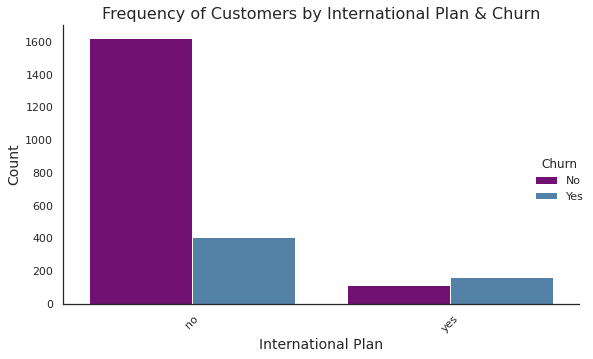

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.catplot( x='intertiol_plan',
             kind="count", 
             hue="Churn", 
             palette=['purple', 'steelblue'],
             height=5, 
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by International Plan & Churn', fontsize=16)

plt.xlabel("International Plan", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)


In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("tips")
x, y, hue = "day", "proportion", "sex"
hue_order = ["Male", "Female"]

(df['voice_mail_plan']
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

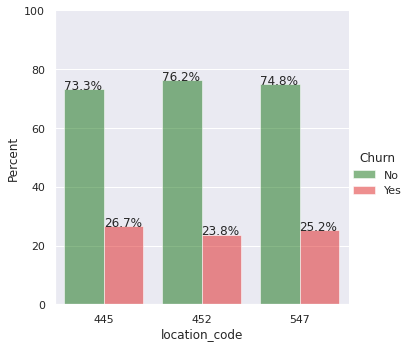

In [ ]:
new_df1 = df.groupby('location_code')['Churn'].value_counts(normalize=True)
new_df1 = new_df1.mul(100).rename('Percent').reset_index()
sns.set(style="darkgrid")
g = sns.catplot(x='location_code', y='Percent', hue='Churn', kind='bar', data=new_df1, palette=['green', 'red'], alpha=0.5)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
new_df = df.groupby('voice_mail_plan')['Churn'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

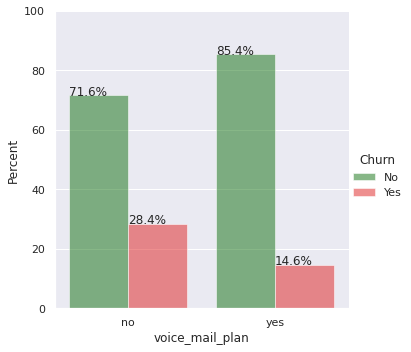

In [ ]:
sns.set(style="darkgrid")
g = sns.catplot(x='voice_mail_plan', y='Percent', hue='Churn', kind='bar', data=new_df, palette=['green', 'red'], alpha=0.5)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
vmyes = df[df['voice_mail_plan'] == 'yes']
vmno = df[df['voice_mail_plan'] == 'no']

In [ ]:
print(vmyes['Churn'].value_counts())
print(vmno['Churn'].value_counts())

No     508
Yes     87
Name: Churn, dtype: int64
No     1229
Yes     488
Name: Churn, dtype: int64


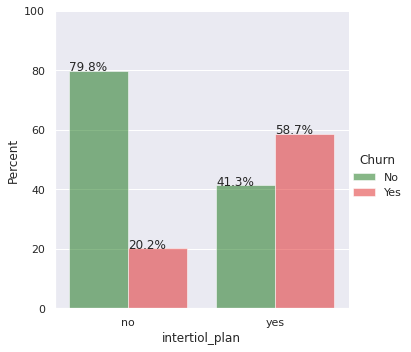

In [ ]:
sns.set(style="darkgrid")
df1 = df.groupby('intertiol_plan')['Churn'].value_counts(normalize=True)
df1 = df1.mul(100).rename('Percent').reset_index()
g = sns.catplot(x='intertiol_plan', y='Percent', hue='Churn', kind='bar', data=df1, palette=['green', 'red'], alpha=0.5)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

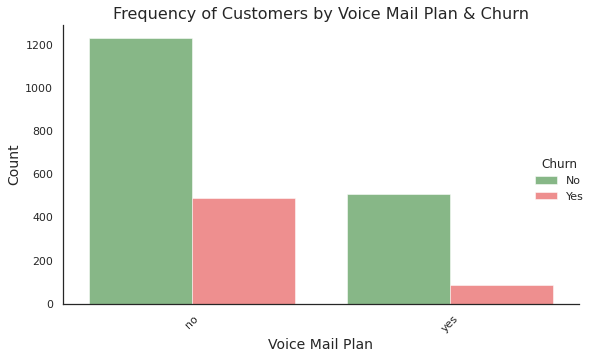

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.catplot( x='voice_mail_plan',
             kind="count", 
             hue="Churn", 
             palette=['green', 'red'],
             height=5, 
             alpha = 0.5,
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by Voice Mail Plan & Churn', fontsize=16)

plt.xlabel("Voice Mail Plan", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)


In [ ]:
churn = df.loc[df['Churn'] == 'Yes']
nchurn = df.loc[df['Churn'] == 'No']

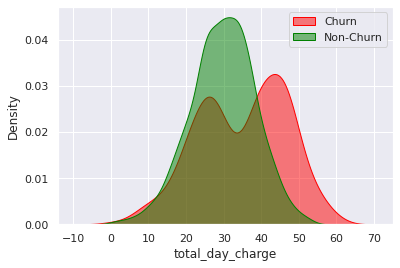

In [ ]:
sns.set(style="darkgrid")
# df = sns.load_dataset('iris')
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(churn['total_day_charge'], shade=True, color="red", alpha = 0.5)
fig = sns.kdeplot(nchurn['total_day_charge'], shade=True, color="green", alpha = 0.5)
plt.legend(labels=["Churn","Non-Churn"])
plt.show()

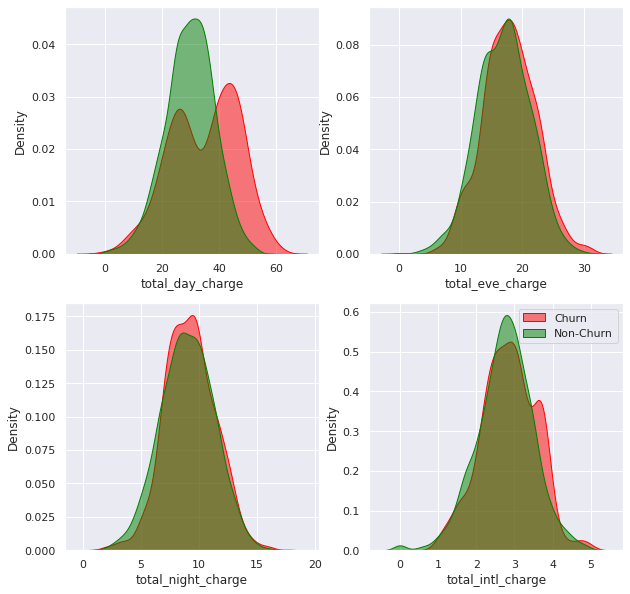

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
cols = ['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge']
i = 0;
for row in range(2):
  for col in range(2):
    sns.set(style="darkgrid")
    sns.kdeplot(ax=axes[row, col], data = churn[cols[i]], shade=True, color="red", alpha = 0.5)
    sns.kdeplot(ax=axes[row, col], data = nchurn[cols[i]], shade=True, color="green", alpha = 0.5)
    plt.legend(labels=["Churn","Non-Churn"])
    # plt.show()
    # axes[row, col].set_title(cols[i])
    i += 1
    


In [ ]:
churn['total_charge'] = churn['total_day_charge'] + churn['total_eve_charge'] + churn['total_night_charge'] + churn['total_intl_charge']
nchurn['total_charge'] = nchurn['total_day_charge'] + nchurn['total_eve_charge'] + nchurn['total_night_charge'] + nchurn['total_intl_charge']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


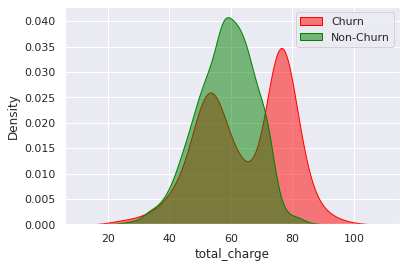

In [ ]:
sns.set(style="darkgrid")
# df = sns.load_dataset('iris')
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(churn['total_charge'], shade=True, color="red", alpha = 0.5)
fig = sns.kdeplot(nchurn['total_charge'], shade=True, color="green", alpha = 0.5)
plt.legend(labels=["Churn","Non-Churn"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


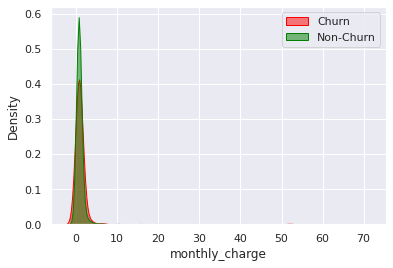

In [ ]:
churn['monthly_charge'] = churn['total_charge']/churn['account_length']
nchurn['monthly_charge'] = nchurn['total_charge']/nchurn['account_length']
sns.set(style="darkgrid")
# df = sns.load_dataset('iris')
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(churn['monthly_charge'], shade=True, color="red", alpha = 0.5)
fig = sns.kdeplot(nchurn['monthly_charge'], shade=True, color="green", alpha = 0.5)
plt.legend(labels=["Churn","Non-Churn"])
plt.show()

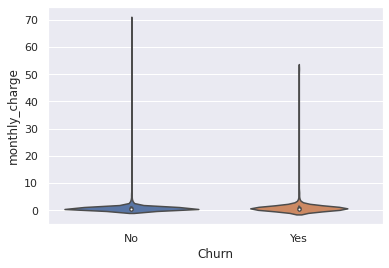

In [ ]:
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']
df['monthly_charge'] = df['total_charge']/df['account_length']
sns.violinplot(x=df["Churn"], y=df["monthly_charge"])

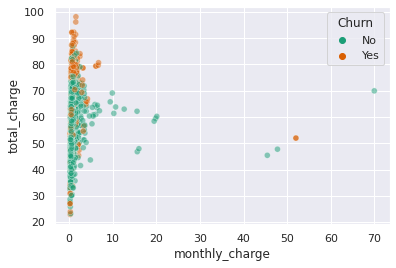

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='monthly_charge',y='total_charge',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

In [ ]:
df['years'] = (df['account_length']/12).apply(np.ceil)

In [ ]:
churn['years'] = (churn['account_length']/12).apply(np.ceil)
nchurn['years'] = (nchurn['account_length']/12).apply(np.ceil)
churn['years'].value_counts()

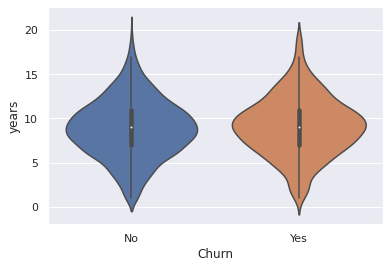

In [ ]:
sns.violinplot(x=df["Churn"], y=df["years"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

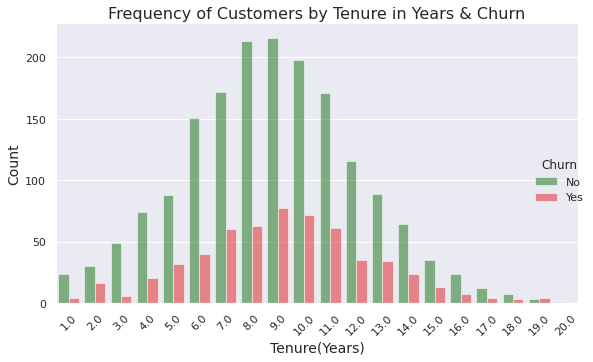

In [ ]:
sns.set(style="darkgrid")

sns.catplot( x='years',
             kind="count", 
             hue="Churn", 
             palette=['green', 'red'],
             height=5, 
             alpha = 0.5,
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by Tenure in Years & Churn', fontsize=16)

plt.xlabel("Tenure(Years)", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)

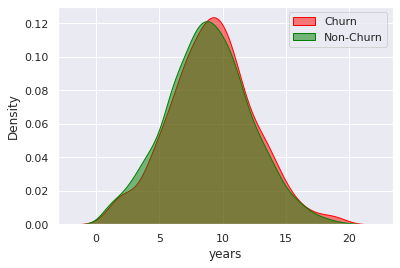

In [ ]:
fig = sns.kdeplot(churn['years'], shade=True, color="red", alpha = 0.5)
fig = sns.kdeplot(nchurn['years'], shade=True, color="green", alpha = 0.5)
plt.legend(labels=["Churn","Non-Churn"])
plt.show()

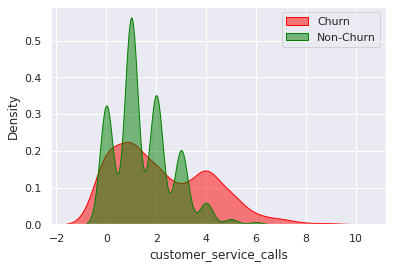

In [ ]:
fig = sns.kdeplot(churn['customer_service_calls'], shade=True, color="red", alpha = 0.5)
fig = sns.kdeplot(nchurn['customer_service_calls'], shade=True, color="green", alpha = 0.5)
plt.legend(labels=["Churn","Non-Churn"])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

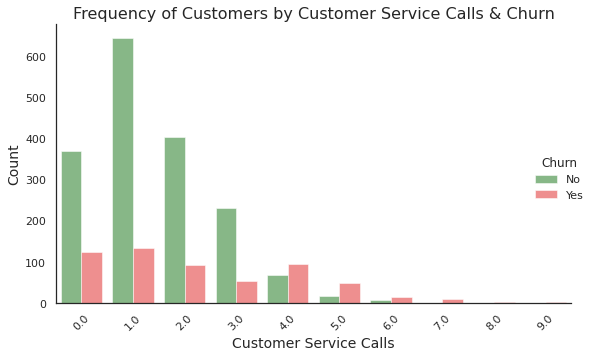

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.catplot( x='customer_service_calls',
             kind="count", 
             hue="Churn", 
             palette=['green', 'red'],
             height=5, 
             alpha = 0.5,
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by Customer Service Calls & Churn', fontsize=16)

plt.xlabel("Customer Service Calls", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

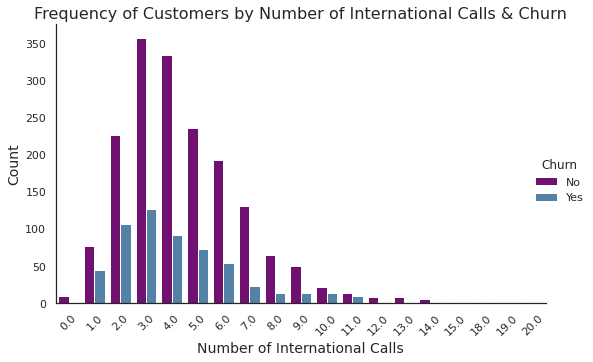

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

sns.catplot( x='total_intl_calls',
             kind="count", 
             hue="Churn", 
             palette=['purple', 'steelblue'],
             height=5, 
             aspect=1.5, 
             data=df)

#add overall title
plt.title('Frequency of Customers by Number of International Calls & Churn', fontsize=16)

plt.xlabel("Number of International Calls", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()

#rotate x-axis labels
plt.xticks(rotation=45)


In [ ]:
df.corr()

customer_id  account_length  location_code  \
customer_id                1.000000       -0.002056      -0.021817   
account_length            -0.002056        1.000000      -0.027968   
location_code             -0.021817       -0.027968       1.000000   
number_vm_messages         0.020036        0.004915       0.012473   
total_day_min              0.029384        0.016249      -0.026687   
total_day_calls           -0.006593        0.010495      -0.016715   
total_day_charge           0.031109        0.016961      -0.026847   
total_eve_min             -0.018394        0.002852       0.016344   
total_eve_calls            0.045902        0.035152      -0.032668   
total_eve_charge          -0.018629        0.002926       0.019484   
total_night_minutes        0.005813       -0.021836      -0.004071   
total_night_calls          0.964159       -0.001277      -0.016023   
total_night_charge         0.006008       -0.021011      -0.004019   
total_intl_minutes         0.008917       -0.008488      -0.020506   
total_intl_calls           0.010291        0.010146      -0.029702   
total_intl_charge          0.008989       -0.008495      -0.020659   
customer_service_calls    -0.036188       -0.001174       0.035208   

                        number_vm_messages  total_day_min  total_day_calls  \
customer_id                       0.020036       0.029384        -0.006593   
account_length                    0.004915       0.016249         0.010495   
location_code                     0.012473      -0.026687        -0.016715   
number_vm_messages                1.000000      -0.025963         0.006285   
total_day_min                    -0.025963       1.000000         0.007566   
total_day_calls                   0.006285       0.007566         1.000000   
total_day_charge                 -0.025215       0.996731         0.007126   
total_eve_min                    -0.014436       0.053274         0.005765   
total_eve_calls                   0.011152       0.005728         0.005047   
total_eve_charge                 -0.015923       0.051733         0.007904   
total_night_minutes               0.003069       0.024721         0.012557   
total_night_calls                 0.018066       0.022857        -0.017724   
total_night_charge                0.004134       0.023474         0.010115   
total_intl_minutes                0.003473      -0.000371         0.003475   
total_intl_calls                  0.034879       0.009506         0.014076   
total_intl_charge                 0.003500      -0.000366         0.003619   
customer_service_calls            0.004113      -0.090491         0.001874   

                        total_day_charge  total_eve_min  total_eve_calls  \
customer_id                     0.031109      -0.018394         0.045902   
account_length                  0.016961       0.002852         0.035152   
location_code                  -0.026847       0.016344        -0.032668   
number_vm_messages             -0.025215      -0.014436         0.011152   
total_day_min                   0.996731       0.053274         0.005728   
total_day_calls                 0.007126       0.005765         0.005047   
total_day_charge                1.000000       0.051183         0.006334   
total_eve_min                   0.051183       1.000000         0.024882   
total_eve_calls                 0.006334       0.024882         1.000000   
total_eve_charge                0.049151       0.996229         0.022639   
total_night_minutes             0.024503       0.028853        -0.034771   
total_night_calls               0.023170      -0.010865         0.039131   
total_night_charge              0.022848       0.027649        -0.034240   
total_intl_minutes             -0.001382      -0.002457        -0.003315   
total_intl_calls                0.010011       0.014615         0.046115   
total_intl_charge              -0.001383      -0.002423        -0.003306   
customer_service_calls         -0.089571      -0.050934        -0.

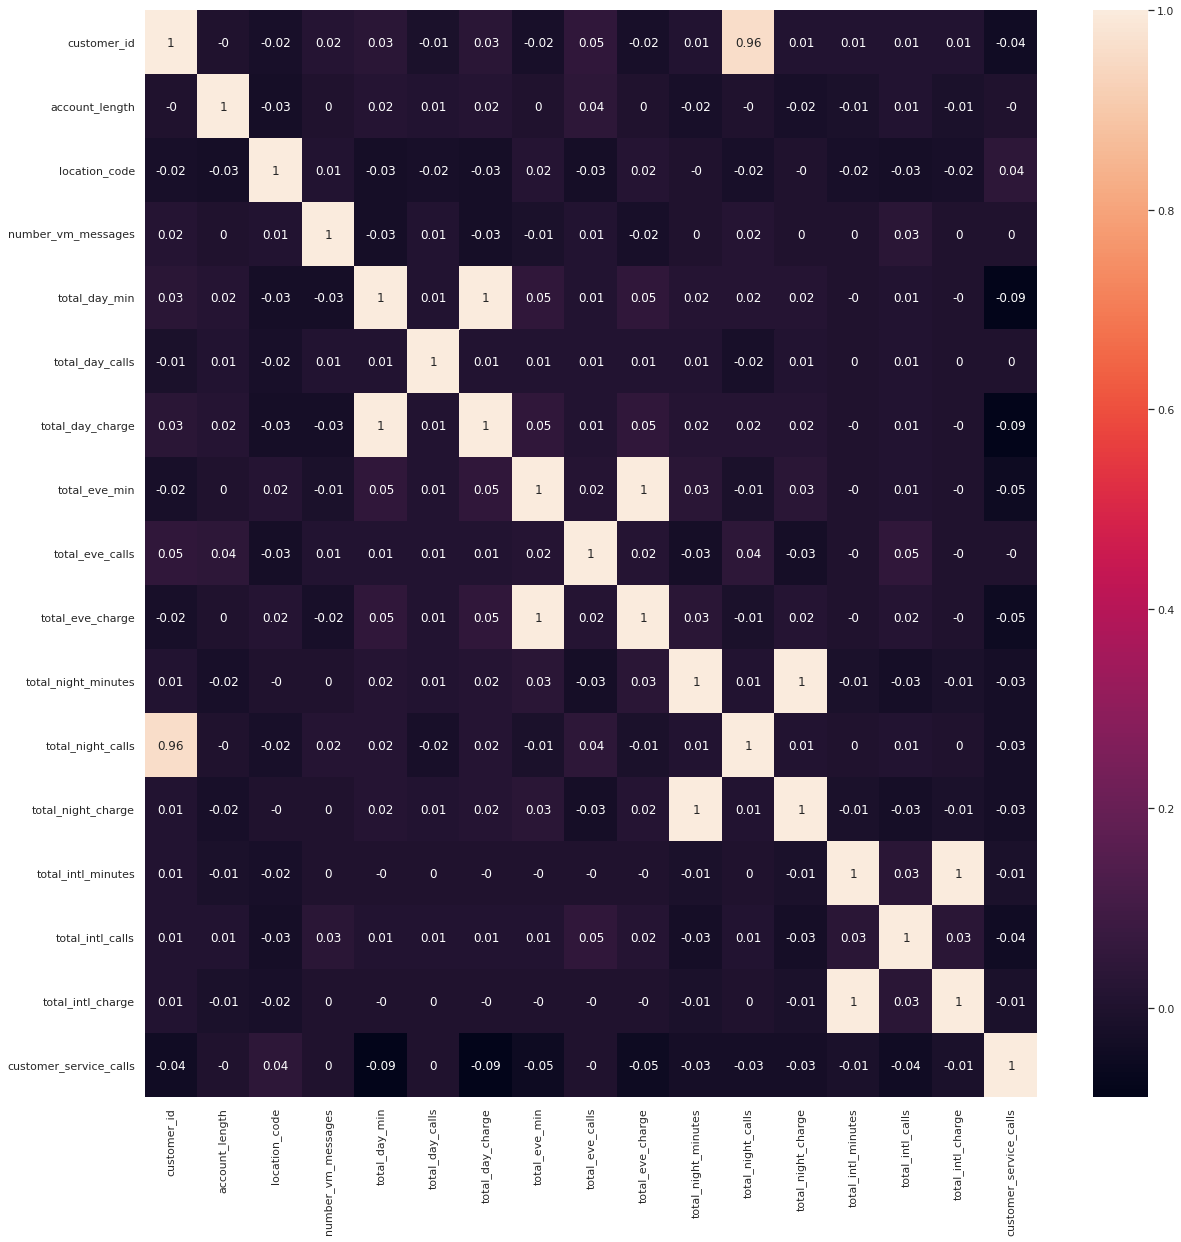

In [ ]:

fig, ax = plt.subplots(figsize=(20,20))    
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [ ]:
churn = df.loc[df['Churn'] == 'Yes']
nchurn = df.loc[df['Churn'] == 'No']

No handles with labels found to put in legend.


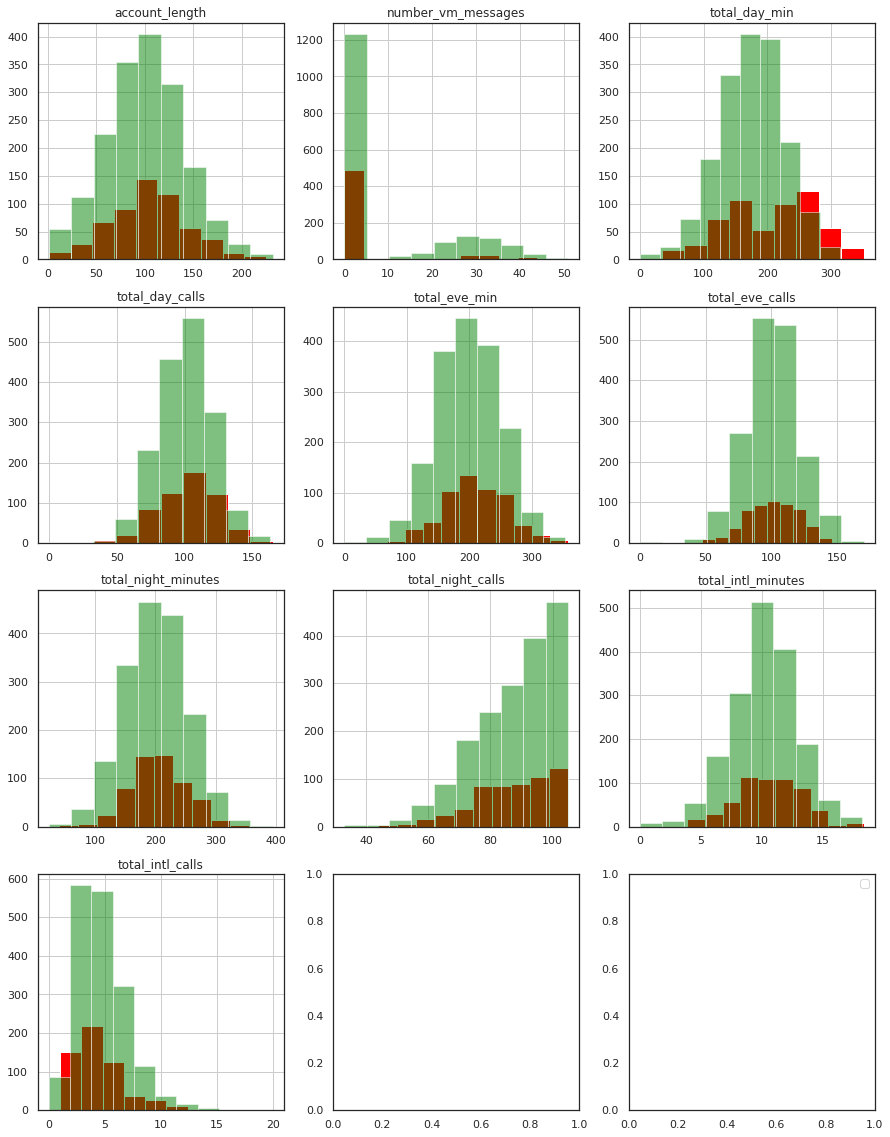

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
cols = ['account_length','number_vm_messages','total_day_min','total_day_calls','total_eve_min','total_eve_calls','total_night_minutes','total_night_calls','total_intl_minutes','total_intl_calls']
i = 0;
for row in range(4):
  for col in range(3):
    churn[cols[i]].hist(ax=axes[row, col], label='Churn', color = "red") #, alpha=0.5
    nchurn[cols[i]].hist(ax=axes[row, col], label='NonChurn',color = "green",alpha=0.5)
    # plt.hist(ax=axes[row, col], x = churn[cols[i]], alpha=0.5, label='Churn')
    # plt.hist(ax=axes[row, col], x = nchurn[cols[i]], alpha=0.5, label='Nonchurn')
    # sns.boxplot(ax=axes[row, col], data=dftest[dftest.columns[i]])
    axes[row, col].set_title(cols[i])
    if i == 9:
      break
    i += 1
plt.legend(loc='upper right')

In [ ]:
df.describe()

customer_id  account_length  location_code  number_vm_messages  \
count  2312.000000     2312.000000    2312.000000         2312.000000   
mean   2160.234862      101.327422     473.525519            7.677336   
std     669.933019       39.923689      42.039577           13.588330   
min    1001.000000        1.000000     445.000000            0.000000   
25%    1579.750000       74.000000     445.000000            0.000000   
50%    2161.500000      101.000000     452.000000            0.000000   
75%    2740.250000      127.000000     452.000000           14.250000   
max    3321.000000      232.000000     547.000000           51.000000   

       total_day_min  total_day_calls  total_day_charge  total_eve_min  \
count    2312.000000      2312.000000       2312.000000    2312.000000   
mean      182.293599       100.771626         30.989252     201.517085   
std        57.676550        20.467168          9.768751      50.928885   
min         0.000000         0.000000          0.000000       0.000000   
25%       144.175000        87.000000         24.495000     165.975000   
50%       180.450000       102.000000         30.600000     202.500000   
75%       221.000000       115.000000         37.605000     236.400000   
max       350.800000       165.000000         60.960000     358.500000   

       total_eve_calls  total_eve_charge  total_night_minutes  \
count      2312.000000       2312.000000          2312.000000   
mean        100.230104         17.135212           201.031055   
std          19.827224          4.323711            50.611196   
min           0.000000          0.000000            23.200000   
25%          87.000000         14.190000           167.275000   
50%         101.000000         17.220000           201.000000   
75%         114.000000         20.090000           234.900000   
max         170.000000         30.830000           395.000000   

       total_night_calls  total_night_charge  total_intl_minutes  \
count        2312.000000         2312.000000         2312.000000   
mean           87.633218            9.044827           10.271064   
std            12.730692            2.278361            2.715125   
min            33.000000            1.040000            0.000000   
25%            79.000000            7.530000            8.600000   
50%            90.000000            9.050000           10.300000   
75%            98.000000           10.572500           12.000000   
max           105.000000           17.770000           18.300000   

       total_intl_calls  total_intl_charge  customer_service_calls  
count       2312.000000        2312.000000             2312.000000  
mean           4.451125           2.773702                1.650952  
std            2.450062           0.732984                1.429327  
min            0.000000           0.000000                0.000000  
25%            3.000000           2.320000                1.000000  
50%            4.000000           2.780000                1.000000  
75%            6.000000           3.240000                2.000000  
max           20.000000           4.940000                9.000000

In [ ]:
df['Churn'].value_counts()

No     1737
Yes     575
Name: Churn, dtype: int64

In [ ]:
df['location_code'].value_counts()

452    1145
445     599
547     568
Name: location_code, dtype: int64

In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

customer_id  account_length  location_code intertiol_plan voice_mail_plan  \
0         1001            15.0            452             no              no   
1         1002           105.0            452             no              no   
2         1003            97.0            452             no             yes   
3         1004           121.0            445             no             yes   
4         1005            98.0            452             no             yes   

   number_vm_messages  total_day_min  total_day_calls  total_day_charge  \
0                 0.0          121.1            130.0             20.59   
1                 0.0          259.3             96.0             44.08   
2                32.0          183.4             94.0             31.18   
3                35.0           68.7             95.0             11.68   
4                22.0          278.3             89.0             47.31   

   total_eve_min  total_eve_calls  total_eve_charge  total_night_minutes  \
0          216.0             86.0             18.36                235.1   
1          175.2             97.0             14.89                222.4   
2          269.1            120.0             22.87                203.5   
3          209.2             69.0             17.78                197.4   
4           93.4            143.0              7.94                107.6   

   total_night_calls  total_night_charge  total_intl_minutes  \
0               33.0               10.58                16.1   
1               36.0               10.01                12.0   
2               38.0                9.16                 6.7   
3               42.0                8.88                11.4   
4               42.0                4.84                 9.7   

   total_intl_calls  total_intl_charge  customer_service_calls Churn  
0               5.0               4.35                     2.0    No  
1               5.0               3.24                     3.0    No  
2               4.0               1.81                     5.0    No  
3               4.0               3.08                     1.0    No  
4               5.0               2.62                     0.0    No

In [ ]:
df['voice_mail_plan'].value_counts()

0    1717
1     595
Name: voice_mail_plan, dtype: int64

In [ ]:
df1 = df.loc[:,['account_length',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls','Churn']]
corrlis = []
collis = []
for col in df1.columns:
  collis.append(col)
  corrlis.append(pointbiserialr(df1['Churn'], df1[col])[0])

pointbi = pd.DataFrame(list(zip(collis,corrlis)), columns =['Metric Predictor Variables', 'Point Biserial Correlation Coefficient with Churn'])
pointbi

Metric Predictor Variables  \
0              account_length   
1          number_vm_messages   
2               total_day_min   
3             total_day_calls   
4            total_day_charge   
5               total_eve_min   
6             total_eve_calls   
7            total_eve_charge   
8         total_night_minutes   
9           total_night_calls   
10         total_night_charge   
11         total_intl_minutes   
12           total_intl_calls   
13          total_intl_charge   
14     customer_service_calls   
15                      Churn   

    Point Biserial Correlation Coefficient with Churn  
0                                            0.036518  
1                                           -0.122005  
2                                            0.227051  
3                                            0.019184  
4                                            0.227685  
5                                            0.090336  
6                                            0.014623  
7                                            0.092892  
8                                            0.044745  
9                                           -0.032791  
10                                           0.043394  
11                                           0.061941  
12                                          -0.052449  
13                                           0.061828  
14                                           0.235763  
15                                           1.000000

In [ ]:
'location_code', 'intertiol_plan', 'voice_mail_plan',

In [ ]:
corr_df  = df[['account_length', 'location_code', 'intertiol_plan', 'voice_mail_plan',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls','Churn']].corr()

In [ ]:
corr_df["Churn"].sort_values().iloc[1:-1]

number_vm_messages       -0.122005
total_intl_calls         -0.052449
total_night_calls        -0.032791
location_code            -0.013087
total_eve_calls           0.014623
total_day_calls           0.019184
account_length            0.036518
total_night_charge        0.043394
total_night_minutes       0.044745
total_intl_charge         0.061828
total_intl_minutes        0.061941
total_eve_min             0.090336
total_eve_charge          0.092892
total_day_min             0.227051
total_day_charge          0.227685
customer_service_calls    0.235763
intertiol_plan            0.291268
Name: Churn, dtype: float64

In [ ]:
px.bar(data_frame=corr_df["Churn"].sort_values().iloc[1:-1],x=corr_df["Churn"].sort_values().iloc[1:-1].index,y=corr_df["Churn"].sort_values().iloc[1:-1].values,title="Feature Correlation to Churn")

In [ ]:
df.corr()

customer_id  account_length  location_code  \
customer_id                1.000000       -0.002056       0.001307   
account_length            -0.002056        1.000000      -0.022011   
location_code              0.001307       -0.022011       1.000000   
intertiol_plan             0.016550        0.029250       0.040564   
voice_mail_plan            0.019602        0.009077       0.019469   
number_vm_messages         0.020036        0.004915       0.019631   
total_day_min              0.029384        0.016249      -0.008634   
total_day_calls           -0.006593        0.010495      -0.012500   
total_day_charge           0.031109        0.016961      -0.008016   
total_eve_min             -0.018394        0.002852      -0.004275   
total_eve_calls            0.045902        0.035152      -0.021774   
total_eve_charge          -0.018629        0.002926      -0.002734   
total_night_minutes        0.005813       -0.021836       0.016443   
total_night_calls          0.964159       -0.001277       0.006297   
total_night_charge         0.006008       -0.021011       0.016477   
total_intl_minutes         0.008917       -0.008488       0.006192   
total_intl_calls           0.010291        0.010146      -0.009698   
total_intl_charge          0.008989       -0.008495       0.006011   
customer_service_calls    -0.036188       -0.001174       0.033738   
Churn                     -0.029312        0.036518      -0.013087   

                        intertiol_plan  voice_mail_plan  number_vm_messages  \
customer_id                   0.016550         0.019602            0.020036   
account_length                0.029250         0.009077            0.004915   
location_code                 0.040564         0.019469            0.019631   
intertiol_plan                1.000000         0.002071            0.006886   
voice_mail_plan               0.002071         1.000000            0.959986   
number_vm_messages            0.006886         0.959986            1.000000   
total_day_min                 0.039348        -0.028002           -0.025963   
total_day_calls              -0.037896         0.004056            0.006285   
total_day_charge              0.043197        -0.027494           -0.025215   
total_eve_min                 0.037189        -0.016680           -0.014436   
total_eve_calls               0.015782         0.013730            0.011152   
total_eve_charge              0.037314        -0.018308           -0.015923   
total_night_minutes          -0.043992        -0.003259            0.003069   
total_night_calls             0.019455         0.019218            0.018066   
total_night_charge           -0.046040        -0.002186            0.004134   
total_intl_minutes            0.079354         0.005255            0.003473   
total_intl_calls              0.000667         0.027700            0.034879   
total_intl_charge             0.079115         0.005302            0.003500   
customer_service_calls       -0.068470        -0.001604            0.004113   
Churn                         0.291268        -0.139567           -0.122005   

                        total_day_min  total_day_calls  total_day_charge  \
customer_id                  0.029384        -0.006593          0.031109   
account_length               0.016249         0.010495          0.016961   
location_code               -0.008634        -0.012500         -0.008016   
intertiol_plan               0.039348        -0.037896          0.043197   
voice_mail_plan             -0.028002         0.004056         -0.027494   
number_vm_messages          -0.025963         0.006285         -0.025215   
total_day_min                1.000000         0.007566          0.996731   
total_day_calls              0.007566         1.000000          0.007126   
total_day_charge             0.996731         0.007126          1.000000   
total_eve_min                0.053274         0.005765          0.051183   
total_eve_calls              0.005728         0.005047   

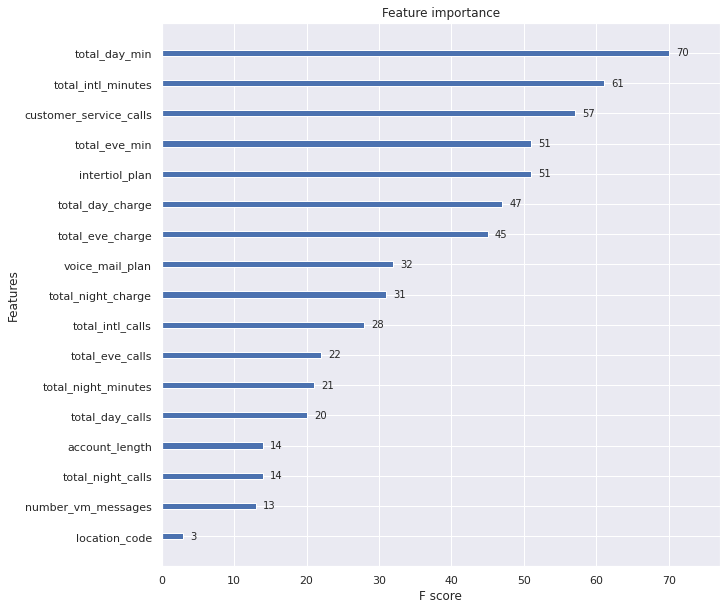

In [ ]:
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
# plot_importance(model)

ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10,10)

In [ ]:
X.columns

Index(['account_length', 'location_code', 'intertiol_plan', 'voice_mail_plan',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls'],
      dtype='object')

In [ ]:
nchurn['customer_service_calls'].value_counts()

1.0    644
2.0    402
0.0    370
3.0    231
4.0     67
5.0     16
6.0      7
Name: customer_service_calls, dtype: int64

In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
preds = clf.predict(X_test)
print(acc(y_test,preds))
print(f1(y_test,preds))

0.7883369330453563
0.43023255813953487


In [ ]:
no_churn = df.groupby(['Churn','account_length']).count().transpose()['No']
yes_churn = df.groupby(['Churn','account_length']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage')

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['account_length', 'location_code', 'intertiol_plan', 'voice_mail_plan',
       'number_vm_messages', 'total_day_min', 'total_day_calls',
       'total_day_charge', 'total_eve_min', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls']
svm = svm.SVC(kernel='linear')
svm.fit(X, y)
f_importances(svm.coef_, features_names)